In [2]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [8]:
df = pd.read_csv("SMA 1-3 Dataset.csv")
hash = 'Hashtags'
df.head(5)

,Post_ID,Post_Date,Content_Type,Content,Hashtags,Location,Likes,Comments,Shares,Followers,Mentioned_Entities
0,1,01-04-2025,Text,"""Loving the weather today!""",#weather #sunny,New York,120,10,5,1500,@user123
1,2,02-04-2025,Image,"""Check out this amazing sunset!""",#sunset #beautiful,Los Angeles,230,20,10,2000,@sunlover
2,3,02-04-2025,Video,"""How to make a perfect coffee""",#coffee #tutorial,Chicago,150,30,15,1800,@coffeeaddict
3,4,03-04-2025,Text,"""Just finished a 5K run!""",#fitness #running,New York,180,40,20,1700,@runwithme
4,5,03-04-2025,Image,"""Delicious homemade pizza!""",#foodie #pizza,Miami,300,50,30,2200,@foodiegram


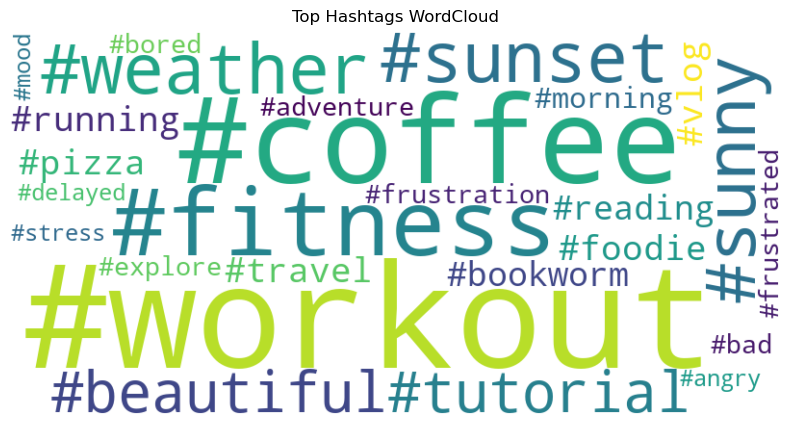

In [12]:
# Convert hashtags string to list
df["hashtags"] = df["Hashtags"].fillna("").apply(lambda x: x.lower().split())

# Flatten the list of all hashtags
all_hashtags = [tag for sublist in df["hashtags"] for tag in sublist]

# Count frequency of hashtags
hashtag_counts = Counter(all_hashtags)
top_hash = hashtag_counts.most_common(4)

hashtag_df = pd.DataFrame(top_hash, columns=['Hashtag', 'Count'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(hashtag_counts)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top Hashtags WordCloud")
plt.show()

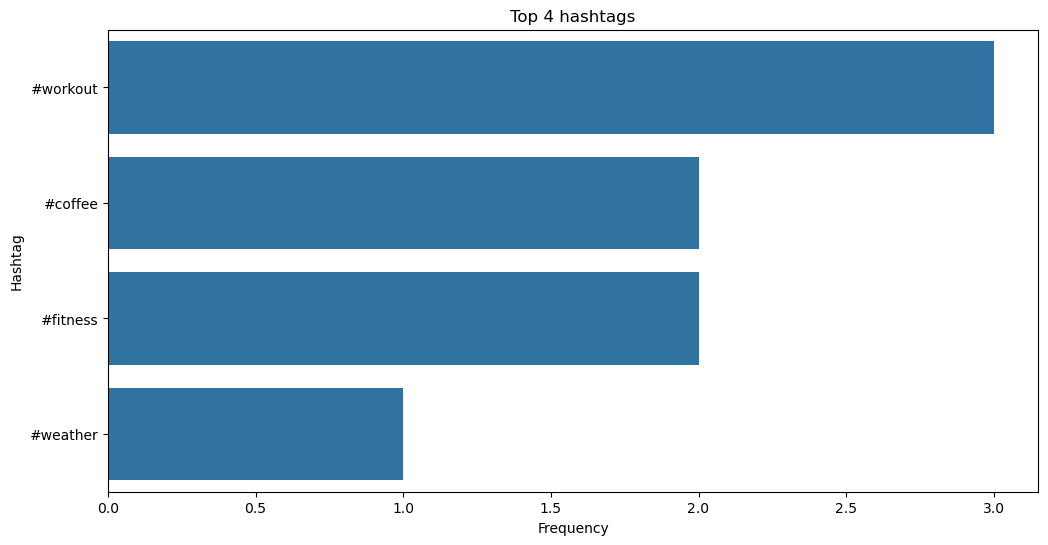

In [14]:
plt.figure(figsize=(12,6))
sns.barplot(data=hashtag_df, x = 'Count', y = 'Hashtag')
plt.title("Top 4 hashtags")
plt.xlabel("Frequency")
plt.ylabel("Hashtag")
plt.show()